<a href="https://colab.research.google.com/github/RonBartov/Data_Processing/blob/main/factory_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factory Data Processing**

# **General Background and Goals**
We have a table called 'factory_test.csv' that contains test data for 51 devices from the population of devices tested in the factory. We are defining the test data as the “**sample group**”.

In addition to the sample group we have a table called 'new_devices.csv' that contains data for 3 additonal devices. We are defining this data as the “**new sample group**”.

### **Main Goal**
Understand the "sample group data" and later to explore and understand the relation of "new sample group" to the "sample group" in terms of probability.

### **Side Goal**
Suggest and implement a method for testng new devices based on our knowledge
of the "sample group" and specify which devices (sample group and new devices) fail the test your tests and why.

# **Data Description**
Both "sample group" and "new sample group" datasets contains the following information:

${\circ}$ 5 **dependent** variables (features) Y1 - Y5.
<br>
${\circ}$ 4 **independent** variables X2 - X5.
<br>
${\circ}$ for i = 2,3,4,5 the feature ${Y_i}$ corresponds to ${X_i}$.
<br>
${\circ}$ The feature ${Y_1}$ has no corresponding variable.

###**Allowed Libraries**
1) Numpy
<br>
2) Pandas
<br>
3) Matplotlib

# **Part by Part**
We will divide this assignment into 5 different sections, each will be focucing on a different task as follows:

${\circ}$ **Section 1-** Data Loading and Description
<br>
${\circ}$ **Section 2-** Data Visualization and Explanaton
<br>
${\circ}$ **Section 3-** Data Preprocessing
<br>
${\circ}$ **Section 4-** Data Exploration
<br>
${\circ}$ **Section 5-** Suggest new testing method
<br>

# **Initial Assumption**
According to the description of the data we can assume that this assignment can be categorized as a "Regression" problem.

Regression analysis is used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (Y in our case) and the variable we are using in order to predict Y's value is called the independent variable, which is X in our case.


###**Using 'Notes'**
In orded to give some clear explenations regarding specific actions or decision we make, we will add a text box with a 'Note' title everytime we would like to explain something.

# **Functions that will be used throughout the assignment**

# **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# **Section 1- Data Loading and Description**
In this section we will load the data of sample group from 'factory_test.csv' and will provide a description of its contents.

We will present the following properties for the data:

${\circ}$ Data shape
<br>
${\circ}$ Range of values in each feature and variable
<br>
${\circ}$ Data distribution: Mean and variance
<br>
${\circ}$ Check for missing values and if exist, we will replace them with a reasonable value  

In [4]:
# mount google drive into colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Loading the sample group data
csv_sample_group_path = r'/content/gdrive/MyDrive/Pulsenmore/factory_test_data.csv'
sample_group = pd.read_csv(csv_sample_group_path)

In [6]:
# Presenting the data frame in order to get initial understanding about the data
num_rows_to_present = 5
sample_group.head(num_rows_to_present)

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491,18,16.8,14,13.33,12,11.12,9,8.33
1,1491,[],[],[],[],[],[],[],[]
2,2004,18,17.94,14,13.99,12,11.72,9,8.65
3,1493,[],[],[],[],[],[],[],[]
4,1497,18,18,14,13.59,12,12.91,9,7.82


In [7]:
# Sample group data frame general information
sample_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y1      51 non-null     int64 
 1   X2      51 non-null     object
 2   Y2      51 non-null     object
 3   X3      51 non-null     object
 4   Y3      51 non-null     object
 5   X4      51 non-null     object
 6   Y4      51 non-null     object
 7   X5      51 non-null     object
 8   Y5      51 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.7+ KB


In [8]:
# Convert all non numeric values to NaN
sample_group = sample_group.apply(pd.to_numeric, errors='coerce')
sample_group.head(num_rows_to_present)

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491,18.0,16.80,14.0,13.33,12.0,11.12,9.0,8.33
1,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,18.0,17.94,14.0,13.99,12.0,11.72,9.0,8.65
3,1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1497,18.0,18.00,14.0,13.59,12.0,12.91,9.0,7.82


In [9]:
# Count the NaN appearence
count_non_numeric_values = sample_group.isnull().sum()
print(f"Number of non numeric values in each column: \n{count_non_numeric_values}")

Number of non numeric values in each column: 
Y1    0
X2    4
Y2    4
X3    4
Y3    4
X4    4
Y4    4
X5    4
Y5    4
dtype: int64


In [10]:
# Replace all NaN values with some reasonable value that will maintain each column mean
means = sample_group.mean()
print(means)
for column in sample_group.columns:
    is_nan = pd.to_numeric(sample_group[column]).isnull()
    sample_group.loc[is_nan, column] = means[column]

sample_group.head(num_rows_to_present)

Y1    1504.960784
X2      18.000000
Y2      17.425957
X3      14.000000
Y3      13.452340
X4      12.000000
Y4      11.673830
X5       9.000000
Y5       8.346383
dtype: float64


,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1491.0,18.0,16.800000,14.0,13.33000,12.0,11.12000,9.0,8.330000
1,1491.0,18.0,17.425957,14.0,13.45234,12.0,11.67383,9.0,8.346383
2,2004.0,18.0,17.940000,14.0,13.99000,12.0,11.72000,9.0,8.650000
3,1493.0,18.0,17.425957,14.0,13.45234,12.0,11.67383,9.0,8.346383
4,1497.0,18.0,18.000000,14.0,13.59000,12.0,12.91000,9.0,7.820000


In [11]:
# Present the summary statistics for each column
summary_stats = sample_group.describe()
print(summary_stats)

                Y1    X2         Y2    X3        Y3    X4         Y4    X5  \
count    51.000000  51.0  51.000000  51.0  51.00000  51.0  51.000000  51.0   
mean   1504.960784  18.0  17.425957  14.0  13.45234  12.0  11.673830   9.0   
std      71.384861   0.0   4.101133   0.0   0.11868   0.0   1.176656   0.0   
min    1487.000000  18.0   7.870000  14.0  13.19000  12.0   9.100000   9.0   
25%    1493.000000  18.0  15.455000  14.0  13.40000  12.0  11.070000   9.0   
50%    1495.000000  18.0  17.425957  14.0  13.45234  12.0  11.540000   9.0   
75%    1497.000000  18.0  20.180000  14.0  13.51500  12.0  12.350000   9.0   
max    2004.000000  18.0  25.260000  14.0  13.99000  12.0  14.560000   9.0   

              Y5  
count  51.000000  
mean    8.346383  
std     0.283728  
min     7.810000  
25%     8.210000  
50%     8.340000  
75%     8.505000  
max     9.160000  


In [12]:
# Recheck elements type
sample_group_cols_type = sample_group.dtypes
print(f"Data type of each column: \n{sample_group_cols_type}")

Data type of each column: 
Y1    float64
X2    float64
Y2    float64
X3    float64
Y3    float64
X4    float64
Y4    float64
X5    float64
Y5    float64
dtype: object


## **Note #1**
${\circ}$ The data shape is 51x9. Each row represent one of the tested devices while the columns represent the values of the different dependent features ${Y_i \space (i=1,2,3,4,5)}$, and their corresponding independent variables ${X_i \space (i=2,3,4,5)}$.

${\circ}$ Initially the data set contained some non numeric values. In order to fill those values with a reasonable values, for each column (feature or variable) we replaced them with the mean value that calculated according to the other numeric entries.

${\circ}$ We can describe the data in the following way:
- ${X_i}$ represent a specific attribute of the device. Each attribute is independent in the other attributes.
- ${Y_i}$ is the value obtained from a specific measurement during the test of the device, while the device has the attribute ${X_i}$
<br>
- Because for each ${i=2,3,4,5}$, ${X_i}$ is a constant, we know that all the 51 devices have the exact same value per attribute, i.e the measurement ${Y_i}$ have been taken from 51 different devices that have the same ${X_i}$.

# **Section 2- Data Preprocessing**

 Feature scaling refers to putting the feature values into the same range. Scaling is extremely important for the algorithms considering the distances between observations.
 A technique to scale data is to squeeze it into a predefined interval.

 It can be done in two ways:

 1) Normalization: The feature values are mapped into the [0, 1] range
 <br>
 2) Standardization: Transform the features to have a mean of 0 and a standard deviation of 1.

 For sample group, we will use the Standardization method.

In [84]:
# Separate the features (Yi columns) from the rest of the data
features_columns = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5']

# Calculate mean and standard deviation for each feature column
means = sample_group[features_columns].mean()
stds = sample_group[features_columns].std()

# Scale the Yi columns (features) with zero mean and variance of 1
scaled_features = (sample_group[features_columns] - means) / stds

# Combine the scaled features with the X columns
X_columns = ['X2', 'X3', 'X4', 'X5']
sample_group = pd.concat([scaled_features, sample_group[X_columns]], axis=1)

# **Section 3- Data Visualization and Explanation**
In this section we will visualize the data and explain the observed paterns or trends.

In this type of problem, helpful visualizations types can be the following:

1) Scatter plot: Will help us understand the relationship between ${X_i}$ and ${Y_i}$ by plotting **all the points** in our data
<br>
2) Box plot: Will present the distribution for each ${Y_i}$ column.

Because the feature ${Y_1}$ has no corresponding variable ${X_1}$, we will visualize it separately.
<br>
In such a case, it would be **unuseful** to present the scatter plot in respect to some ${X_i}$ (which gives us some information about the correlation between ${Y_1}$ and ${X_i}$), but visualizing the elements distribution could help.

Another important thing is that all the features ${Y_i}$ are depend in each other, thus it make sense to create a scatter plot between them.

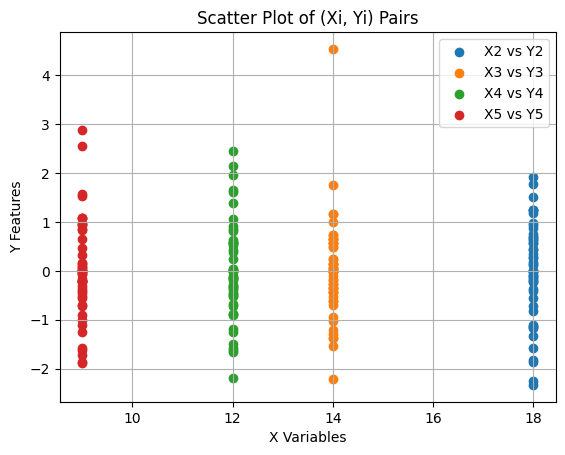

In [85]:
# Scatter plot for features with corresponding variables
x_columns = ['X2', 'X3', 'X4', 'X5']
y_columns = ['Y2', 'Y3', 'Y4', 'Y5']

for x_col, y_col in zip(x_columns, y_columns):
    plt.scatter(sample_group[x_col], sample_group[y_col], label=f'{x_col} vs {y_col}')

plt.xlabel('X Variables')
plt.ylabel('Y Features')
plt.legend()
plt.title('Scatter Plot of (Xi, Yi) Pairs')
plt.grid(True)

plt.show()

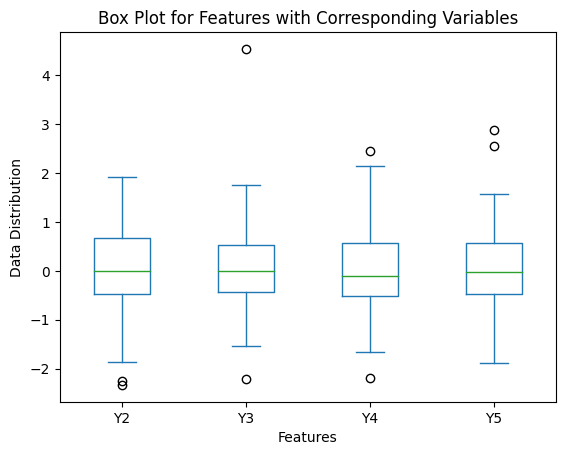

In [86]:
# Box plot for features with corresponding variables
# Create a new DataFrame for Yi columns except Y1 and rename the columns
sample_group_Y = sample_group[y_columns].copy()

sample_group_Y.plot(kind='box',xlabel='Features', ylabel='Data Distribution', title='Box Plot for Features with Corresponding Variables');

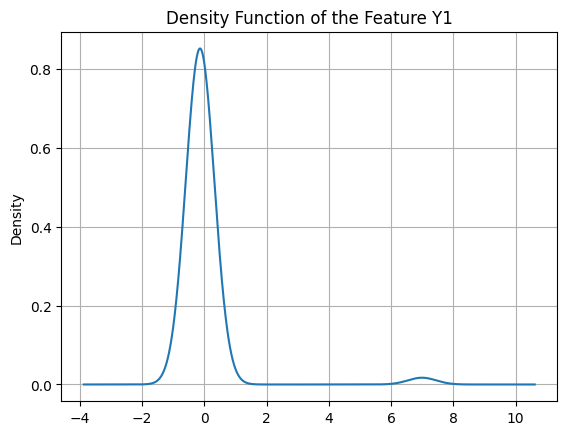

In [87]:
# Density function of the feature Y1
sample_group['Y1'].plot.density(grid=True, xlabel='Y1 Elements Values', title='Density Function of the Feature Y1');

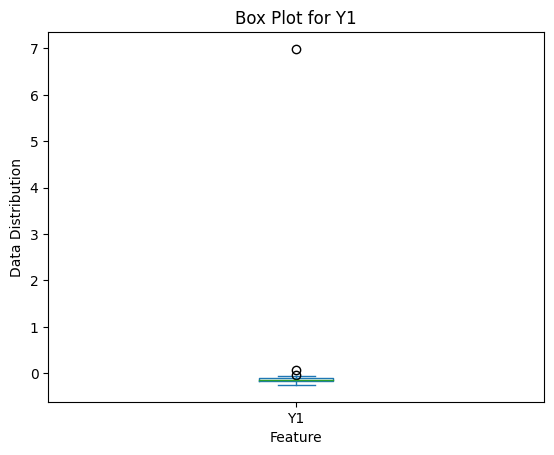

In [88]:
# Box plot for the feature Y1
sample_group['Y1'].plot(kind='box',xlabel='Feature', ylabel='Data Distribution', title='Box Plot for Y1');

In [89]:
# Display the number of elements per value in Y1
count_Y1_elements = sample_group.groupby('Y1').size()
count_Y1_elements

Y1
-0.251605    1
-0.237596    2
-0.195571    7
-0.181562    1
-0.167554    7
-0.153545    5
-0.139536    6
-0.125528    6
-0.111519    5
-0.097511    4
-0.083502    1
-0.069494    2
-0.055485    1
-0.027468    1
 0.070592    1
 6.990827    1
dtype: int64

In [90]:
# Find the number of row that hasthe highest Y1 value
highest_value_in_Y1 = sample_group['Y1'].max()
row_num_with_highest_Y1 = sample_group.loc[sample_group['Y1'] == highest_value_in_Y1].index[0]
print(f' The row with highest value for the feature Y1 in sample_group: {row_num_with_highest_Y1}')

 The row with highest value for the feature Y1 in sample_group: 2


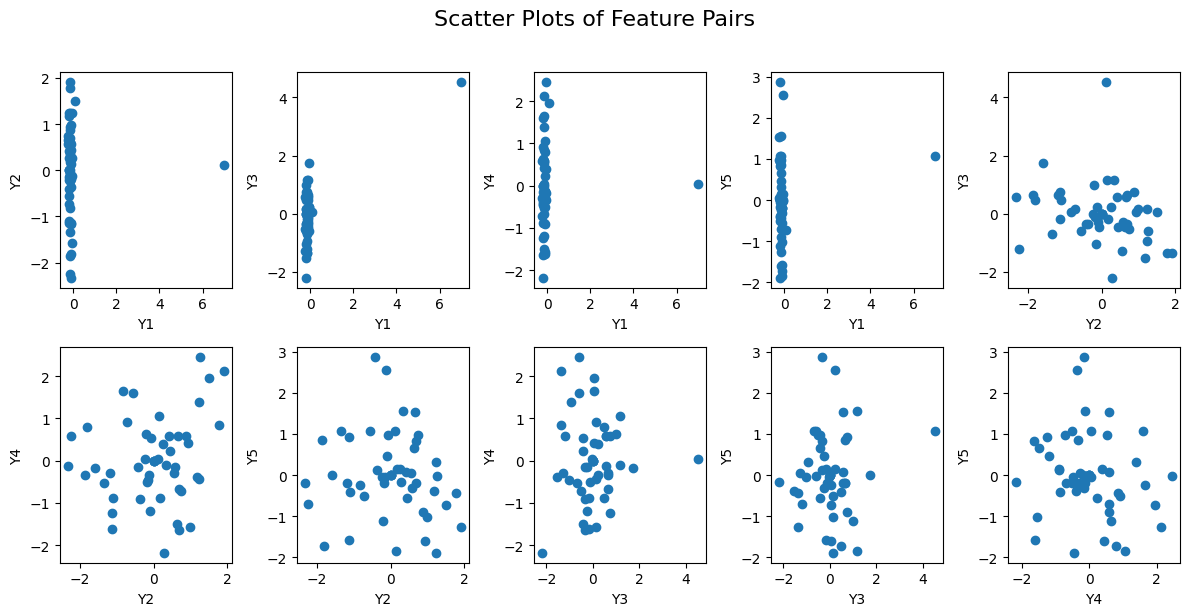

In [91]:
# Calculating total number of different features pairs according to the Binomial coefficient (choosing 2 out of 5 elements)
num_of_feature_pairs = 10

features = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5']

# Create subplots for all combinations of features
fig, axes = plt.subplots(2, int(num_of_feature_pairs/2), figsize=(12, 6))
fig.suptitle("Scatter Plots of Feature Pairs", fontsize=16, y=1.02)

# Loop over rows and columns for subplots
plt_row = 0
plt_col = 0
for i in range(len(features)-1):
    for j in range(i+1,len(features)):

        # Get the names of the features to be plotted
        y1_feature = features[i]
        y2_feature = features[j]

        # Plot the scatter plot of Yi vs Yj
        axes[plt_row, plt_col].scatter(sample_group[y1_feature], sample_group[y2_feature])

        # Set axis labels and subplot titles
        axes[plt_row, plt_col].set_xlabel(y1_feature)
        axes[plt_row, plt_col].set_ylabel(y2_feature)

        plt_col = (plt_col + 1) % len(features)
        if plt_col == 0:
          plt_row += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

## **Note #2**
According to the results we can conclude the following:

${\circ}$ From the scatter plots we see a verticle behaviour, as expected due to the constant value of each ${X_i}$. This verticle line tells us that there is no correlation between ${Y_i}$ and its corresponding ${X_i}$.
<br>
${\circ}$ According to the statistics summary (**before the preprocessing**) that we presented earlier, we know that ${σ_{Y3} \le σ_{Y5} \le σ_{Y4} \le σ_{Y2}}$. Again, according to the previous explenation, there is no correlation, but if we still wanted to estimate some feature according to a given independent variable, the estimation would be better for the features with the lowest standard deviation, ${Y3}$ and ${Y5}$ in our case.
<br>
${\circ}$ From the scatter plots between the different features we can see that ${Y_1}$ has no correlation with the other features, while the other features ${Y_i}$ for ${i \neq 1}$ are correlated with each other. Actually, we **can** define some approximate linear relationbetween them, while the intensity of the correlation will be varying according to the spread of the points in the plot.


### The meaning of ${Y_1}$
According to the results so far, ${Y_1}$ can have the following interpretations:

1) A measure of some outcome of interest that is being studied independently (for example it might represent the number of times a particular event or condition was observed during a series of tests)

2) A control feature used to adjust for certain effects when analyzing the relationships between the other features and variables